In [375]:
import sqlite3
import pandas as pd
conn = sqlite3.connect('FPA_FOD_20170508.sqlite')
df = pd.read_sql(
                       """
                       
                        SELECT *
                        from fires 
                        
                       """, con=conn)

In [376]:
df.head()

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,...,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


In [377]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn import tree, preprocessing
import sklearn.ensemble as ske
from sklearn.model_selection import train_test_split

In [378]:
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
import statsmodels.api as sm
from scipy import stats
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor


In [379]:
# df3=pd.read_sql_query("select * from fires",conn)
# df3.head()

In [312]:
# df4 = pd.read_sql_query("SELECT FIRE_CODE,FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,COUNTY FROM 'Fires'", conn)
# print(df4.head())

In [380]:
data = pd.read_sql_query("SELECT Fire_Code,fire_name,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,FIRE_SIZE,FIRE_SIZE_CLASS FROM 'Fires'", conn)
print(data.head())

  FIRE_CODE FIRE_NAME  FIRE_YEAR STAT_CAUSE_DESCR   LATITUDE   LONGITUDE  \
0      BJ8K  FOUNTAIN       2005    Miscellaneous  40.036944 -121.005833   
1      AAC0    PIGEON       2004        Lightning  38.933056 -120.404444   
2      A32W     SLACK       2004   Debris Burning  38.984167 -120.735556   
3      None      DEER       2004        Lightning  38.559167 -119.913333   
4      None  STEVENOT       2004        Lightning  38.559167 -119.933056   

  STATE  FIRE_SIZE FIRE_SIZE_CLASS  
0    CA       0.10               A  
1    CA       0.25               A  
2    CA       0.10               A  
3    CA       0.10               A  
4    CA       0.10               A  


In [381]:
data.shape

(1880465, 9)

In [382]:
data.info

<bound method DataFrame.info of         FIRE_CODE                  FIRE_NAME  FIRE_YEAR   STAT_CAUSE_DESCR  \
0            BJ8K                   FOUNTAIN       2005      Miscellaneous   
1            AAC0                     PIGEON       2004          Lightning   
2            A32W                      SLACK       2004     Debris Burning   
3            None                       DEER       2004          Lightning   
4            None                   STEVENOT       2004          Lightning   
...           ...                        ...        ...                ...   
1880460      None                   ODESSA 2       2015  Missing/Undefined   
1880461      None                       None       2015      Miscellaneous   
1880462      None                       None       2015  Missing/Undefined   
1880463      None                       None       2015  Missing/Undefined   
1880464      None  BARKER BL  BIG_BEAR_LAKE_       2015      Miscellaneous   

          LATITUDE   LONGITUDE 

In [383]:
total = data.isnull().sum().sort_values(ascending=False) 
total

FIRE_CODE           1555636
FIRE_NAME            957189
FIRE_SIZE_CLASS           0
FIRE_SIZE                 0
STATE                     0
LONGITUDE                 0
LATITUDE                  0
STAT_CAUSE_DESCR          0
FIRE_YEAR                 0
dtype: int64

In [384]:
data['DISCOVER_DATE'] = pd.to_datetime(df['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
print(data.head())

  FIRE_CODE FIRE_NAME  FIRE_YEAR STAT_CAUSE_DESCR   LATITUDE   LONGITUDE  \
0      BJ8K  FOUNTAIN       2005    Miscellaneous  40.036944 -121.005833   
1      AAC0    PIGEON       2004        Lightning  38.933056 -120.404444   
2      A32W     SLACK       2004   Debris Burning  38.984167 -120.735556   
3      None      DEER       2004        Lightning  38.559167 -119.913333   
4      None  STEVENOT       2004        Lightning  38.559167 -119.933056   

  STATE  FIRE_SIZE FIRE_SIZE_CLASS DISCOVER_DATE  
0    CA       0.10               A    2005-02-02  
1    CA       0.25               A    2004-05-12  
2    CA       0.10               A    2004-05-31  
3    CA       0.10               A    2004-06-28  
4    CA       0.10               A    2004-06-28  


In [385]:
data['CONTROL_DATE'] = pd.to_datetime(df['CONT_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
print(data.head())

  FIRE_CODE FIRE_NAME  FIRE_YEAR STAT_CAUSE_DESCR   LATITUDE   LONGITUDE  \
0      BJ8K  FOUNTAIN       2005    Miscellaneous  40.036944 -121.005833   
1      AAC0    PIGEON       2004        Lightning  38.933056 -120.404444   
2      A32W     SLACK       2004   Debris Burning  38.984167 -120.735556   
3      None      DEER       2004        Lightning  38.559167 -119.913333   
4      None  STEVENOT       2004        Lightning  38.559167 -119.933056   

  STATE  FIRE_SIZE FIRE_SIZE_CLASS DISCOVER_DATE CONTROL_DATE  
0    CA       0.10               A    2005-02-02   2005-02-02  
1    CA       0.25               A    2004-05-12   2004-05-12  
2    CA       0.10               A    2004-05-31   2004-05-31  
3    CA       0.10               A    2004-06-28   2004-07-03  
4    CA       0.10               A    2004-06-28   2004-07-03  


In [386]:
data_year = pd.read_sql_query("SELECT fire_year,count(fire_year)as fires FROM 'Fires' group by fire_year", conn)
print(data_year)

    FIRE_YEAR   fires
0        1992   67975
1        1993   61989
2        1994   75955
3        1995   71472
4        1996   75574
5        1997   61450
6        1998   68370
7        1999   89363
8        2000   96416
9        2001   86587
10       2002   75656
11       2003   68261
12       2004   69279
13       2005   88604
14       2006  114004
15       2007   95573
16       2008   85378
17       2009   78325
18       2010   79889
19       2011   90552
20       2012   72769
21       2013   64780
22       2014   67753
23       2015   74491


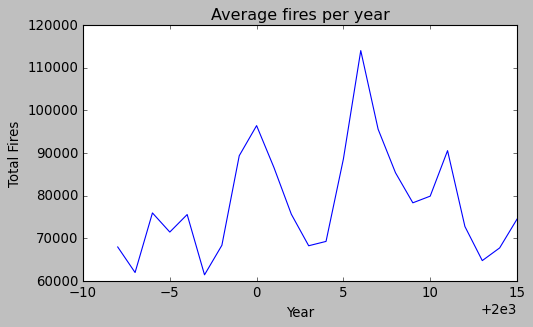

In [387]:
count = [67975,61989,75955,71472,75574,61450,68370,89363,96416,86587,75656,68261,69279,88604,114004,95573,85378,78325,79889,90552,72769,64780,67753,74491]

month = [1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015]
fig, ax = plt.subplots(figsize=(7, 4))

ax.plot(month, 
        count)
ax.set(title = "Average fires per year",
       xlabel = "Year",
       ylabel = "Total Fires")
plt.show()


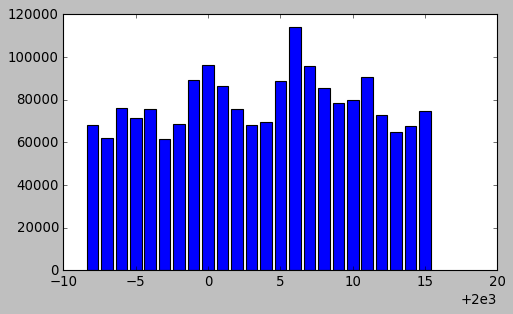

In [388]:
fig, ax = plt.subplots(figsize=(7, 4))
ax.bar(month, 
        count,
        color ='blue' )
plt.show()

In [389]:
print(data.head())

  FIRE_CODE FIRE_NAME  FIRE_YEAR STAT_CAUSE_DESCR   LATITUDE   LONGITUDE  \
0      BJ8K  FOUNTAIN       2005    Miscellaneous  40.036944 -121.005833   
1      AAC0    PIGEON       2004        Lightning  38.933056 -120.404444   
2      A32W     SLACK       2004   Debris Burning  38.984167 -120.735556   
3      None      DEER       2004        Lightning  38.559167 -119.913333   
4      None  STEVENOT       2004        Lightning  38.559167 -119.933056   

  STATE  FIRE_SIZE FIRE_SIZE_CLASS DISCOVER_DATE CONTROL_DATE  
0    CA       0.10               A    2005-02-02   2005-02-02  
1    CA       0.25               A    2004-05-12   2004-05-12  
2    CA       0.10               A    2004-05-31   2004-05-31  
3    CA       0.10               A    2004-06-28   2004-07-03  
4    CA       0.10               A    2004-06-28   2004-07-03  


In [390]:
data['STAT_CAUSE_DESCR'].value_counts()

Debris Burning       429028
Miscellaneous        323805
Arson                281455
Lightning            278468
Missing/Undefined    166723
Equipment Use        147612
Campfire              76139
Children              61167
Smoking               52869
Railroad              33455
Powerline             14448
Fireworks             11500
Structure              3796
Name: STAT_CAUSE_DESCR, dtype: int64

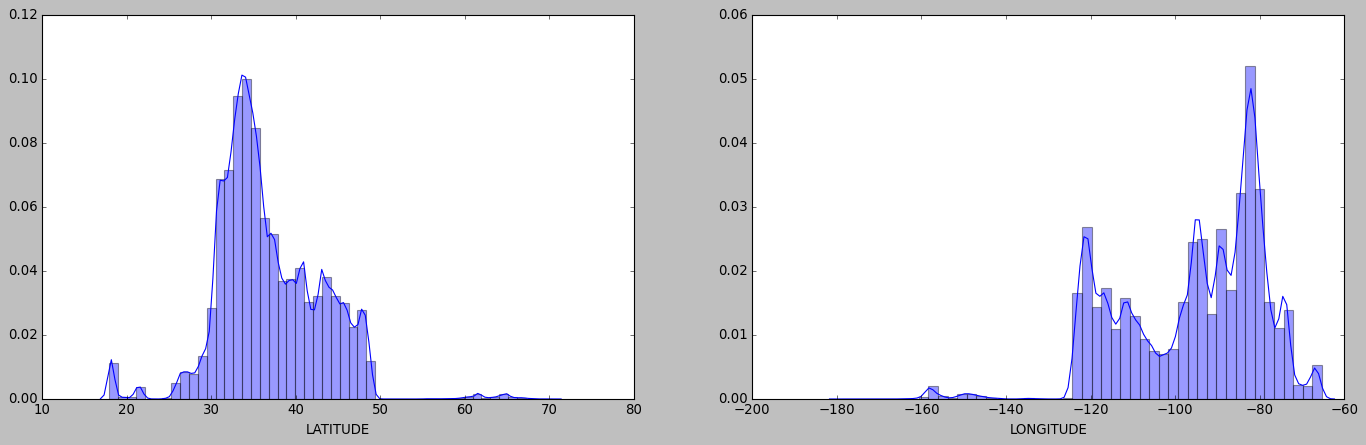

In [391]:
fig, axes = plt.subplots(1,2, figsize=(21,6))
sns.distplot(data['LATITUDE'], ax=axes[0])

sns.distplot(data['LONGITUDE'], ax=axes[1])


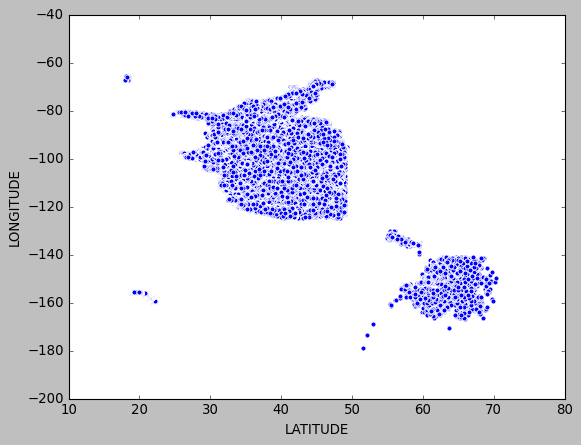

In [392]:
sns.scatterplot(x= data['LATITUDE'], y=data['LONGITUDE'])

Text(0, 0.5, 'causes')

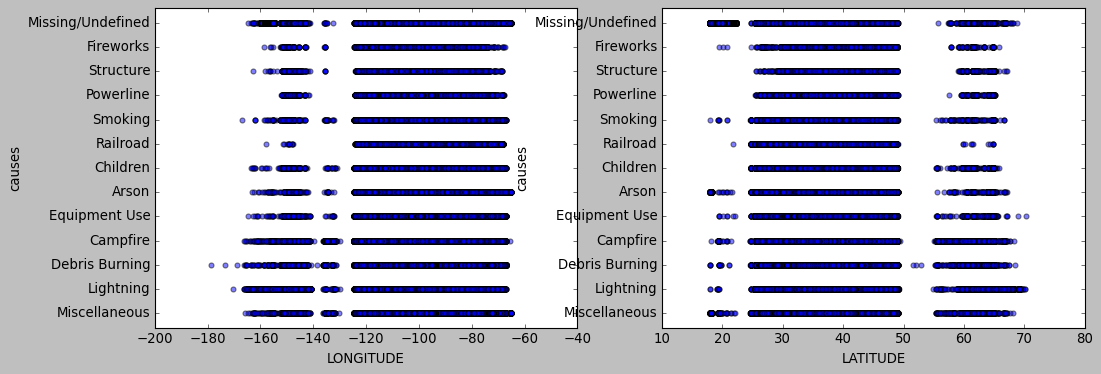

In [393]:
fig,ax=plt.subplots(1,2,figsize=(15,5))

ax[0].scatter(y=data['STAT_CAUSE_DESCR'],x=data['LONGITUDE'],alpha=.5)
ax[0].set_xlabel(xlabel='LONGITUDE')
ax[0].set_ylabel(ylabel='causes')

ax[1].scatter(y=data['STAT_CAUSE_DESCR'],x=data['LATITUDE'],alpha=.5)
ax[1].set_xlabel(xlabel='LATITUDE')
ax[1].set_ylabel(ylabel='causes')

In [394]:
data2=data

In [395]:
data2

,FIRE_CODE,FIRE_NAME,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,FIRE_SIZE,FIRE_SIZE_CLASS,DISCOVER_DATE,CONTROL_DATE
0,BJ8K,FOUNTAIN,2005,Miscellaneous,40.036944,-121.005833,CA,0.10,A,2005-02-02,2005-02-02
1,AAC0,PIGEON,2004,Lightning,38.933056,-120.404444,CA,0.25,A,2004-05-12,2004-05-12
2,A32W,SLACK,2004,Debris Burning,38.984167,-120.735556,CA,0.10,A,2004-05-31,2004-05-31
3,None,DEER,2004,Lightning,38.559167,-119.913333,CA,0.10,A,2004-06-28,2004-07-03
4,None,STEVENOT,2004,Lightning,38.559167,-119.933056,CA,0.10,A,2004-06-28,2004-07-03
...,...,...,...,...,...,...,...,...,...,...,...
1880460,None,ODESSA 2,2015,Missing/Undefined,40.481637,-122.389375,CA,0.01,A,2015-09-26,2015-09-26
1880461,None,None,2015,Miscellaneous,37.617619,-120.938570,CA,0.20,A,2015-10-05,NaT
1880462,None,None,2015,Missing/Undefined,37.617619,-120.938570,CA,0.10,A,2015-05-02,NaT
1880463,None,None,2015,Missing/Undefined,37.672235,-120.898356,CA,2.00,B,2015-10-14,NaT


In [396]:
le = preprocessing.LabelEncoder()
data2['STAT_CAUSE_DESCR'] = le.fit_transform(df['STAT_CAUSE_DESCR'])
data2['STATE'] = le.fit_transform(df['STATE'])
print(data2.head())

  FIRE_CODE FIRE_NAME  FIRE_YEAR  STAT_CAUSE_DESCR   LATITUDE   LONGITUDE  \
0      BJ8K  FOUNTAIN       2005                 7  40.036944 -121.005833   
1      AAC0    PIGEON       2004                 6  38.933056 -120.404444   
2      A32W     SLACK       2004                 3  38.984167 -120.735556   
3      None      DEER       2004                 6  38.559167 -119.913333   
4      None  STEVENOT       2004                 6  38.559167 -119.933056   

   STATE  FIRE_SIZE FIRE_SIZE_CLASS DISCOVER_DATE CONTROL_DATE  
0      4       0.10               A    2005-02-02   2005-02-02  
1      4       0.25               A    2004-05-12   2004-05-12  
2      4       0.10               A    2004-05-31   2004-05-31  
3      4       0.10               A    2004-06-28   2004-07-03  
4      4       0.10               A    2004-06-28   2004-07-03  


In [397]:
data_state= pd.read_sql_query("SELECT distinct state FROM 'Fires' order by state", conn)
print(data_state)

   STATE
0     AK
1     AL
2     AR
3     AZ
4     CA
5     CO
6     CT
7     DC
8     DE
9     FL
10    GA
11    HI
12    IA
13    ID
14    IL
15    IN
16    KS
17    KY
18    LA
19    MA
20    MD
21    ME
22    MI
23    MN
24    MO
25    MS
26    MT
27    NC
28    ND
29    NE
30    NH
31    NJ
32    NM
33    NV
34    NY
35    OH
36    OK
37    OR
38    PA
39    PR
40    RI
41    SC
42    SD
43    TN
44    TX
45    UT
46    VA
47    VT
48    WA
49    WI
50    WV
51    WY


In [398]:
data_cause= pd.read_sql_query("SELECT distinct stat_cause_descr FROM 'Fires' order by stat_cause_descr", conn)
print(data_cause)

     STAT_CAUSE_DESCR
0               Arson
1            Campfire
2            Children
3      Debris Burning
4       Equipment Use
5           Fireworks
6           Lightning
7       Miscellaneous
8   Missing/Undefined
9           Powerline
10           Railroad
11            Smoking
12          Structure


In [399]:
data2

,FIRE_CODE,FIRE_NAME,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,FIRE_SIZE,FIRE_SIZE_CLASS,DISCOVER_DATE,CONTROL_DATE
0,BJ8K,FOUNTAIN,2005,7,40.036944,-121.005833,4,0.10,A,2005-02-02,2005-02-02
1,AAC0,PIGEON,2004,6,38.933056,-120.404444,4,0.25,A,2004-05-12,2004-05-12
2,A32W,SLACK,2004,3,38.984167,-120.735556,4,0.10,A,2004-05-31,2004-05-31
3,None,DEER,2004,6,38.559167,-119.913333,4,0.10,A,2004-06-28,2004-07-03
4,None,STEVENOT,2004,6,38.559167,-119.933056,4,0.10,A,2004-06-28,2004-07-03
...,...,...,...,...,...,...,...,...,...,...,...
1880460,None,ODESSA 2,2015,8,40.481637,-122.389375,4,0.01,A,2015-09-26,2015-09-26
1880461,None,None,2015,7,37.617619,-120.938570,4,0.20,A,2015-10-05,NaT
1880462,None,None,2015,8,37.617619,-120.938570,4,0.10,A,2015-05-02,NaT
1880463,None,None,2015,8,37.672235,-120.898356,4,2.00,B,2015-10-14,NaT


In [400]:
data2.corr()

,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,FIRE_SIZE
FIRE_YEAR,1.000000,0.050389,0.000407,0.015863,0.102115,0.007048
STAT_CAUSE_DESCR,0.050389,1.000000,0.012729,-0.123879,0.036004,0.010450
LATITUDE,0.000407,0.012729,1.000000,-0.354727,0.152474,0.038860
LONGITUDE,0.015863,-0.123879,-0.354727,1.000000,0.207575,-0.039731
STATE,0.102115,0.036004,0.152474,0.207575,1.000000,-0.008003
FIRE_SIZE,0.007048,0.010450,0.038860,-0.039731,-0.008003,1.000000


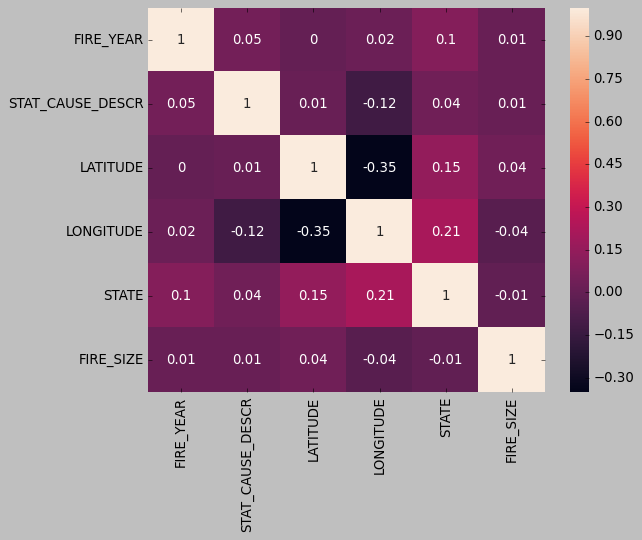

In [401]:
correlation_matrix = data2.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [402]:
#weak correlation

In [403]:
data3 = pd.read_sql_query("SELECT FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,FIRE_SIZE FROM 'Fires'", conn)

In [404]:
le = preprocessing.LabelEncoder()
data3['STAT_CAUSE_DESCR'] = le.fit_transform(df['STAT_CAUSE_DESCR'])
data3['STATE'] = le.fit_transform(df['STATE'])
print(data3.head())

   FIRE_YEAR  STAT_CAUSE_DESCR   LATITUDE   LONGITUDE  STATE  FIRE_SIZE
0       2005                 7  40.036944 -121.005833      4       0.10
1       2004                 6  38.933056 -120.404444      4       0.25
2       2004                 3  38.984167 -120.735556      4       0.10
3       2004                 6  38.559167 -119.913333      4       0.10
4       2004                 6  38.559167 -119.933056      4       0.10


In [405]:
data3['DATE'] = pd.to_datetime(df['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
data3['MONTH'] = pd.DatetimeIndex(df['DISCOVERY_DATE']).month
data3=data3.dropna()
data3

,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,FIRE_SIZE,DATE,MONTH
0,2005,7,40.036944,-121.005833,4,0.10,2005-02-02,1
1,2004,6,38.933056,-120.404444,4,0.25,2004-05-12,1
2,2004,3,38.984167,-120.735556,4,0.10,2004-05-31,1
3,2004,6,38.559167,-119.913333,4,0.10,2004-06-28,1
4,2004,6,38.559167,-119.933056,4,0.10,2004-06-28,1
...,...,...,...,...,...,...,...,...
1880460,2015,8,40.481637,-122.389375,4,0.01,2015-09-26,1
1880461,2015,7,37.617619,-120.938570,4,0.20,2015-10-05,1
1880462,2015,8,37.617619,-120.938570,4,0.10,2015-05-02,1
1880463,2015,8,37.672235,-120.898356,4,2.00,2015-10-14,1


In [406]:
data_test=data3.drop("DATE",axis=1)
data_test=data_test.dropna()
data_test

,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,FIRE_SIZE,MONTH
0,2005,7,40.036944,-121.005833,4,0.10,1
1,2004,6,38.933056,-120.404444,4,0.25,1
2,2004,3,38.984167,-120.735556,4,0.10,1
3,2004,6,38.559167,-119.913333,4,0.10,1
4,2004,6,38.559167,-119.933056,4,0.10,1
...,...,...,...,...,...,...,...
1880460,2015,8,40.481637,-122.389375,4,0.01,1
1880461,2015,7,37.617619,-120.938570,4,0.20,1
1880462,2015,8,37.617619,-120.938570,4,0.10,1
1880463,2015,8,37.672235,-120.898356,4,2.00,1


In [407]:
X=data_test.drop(['STAT_CAUSE_DESCR'],axis=1).values
y=data_test['STAT_CAUSE_DESCR'].values

In [408]:
X=X[:,np.newaxis,2]


In [409]:
# X_train, X_test, y_train, y_test = train_test_split(diabetes_X,y,test_size=0.3, random_state=0)
X_train = X[:-20]
X_test = X[-20:]
y_train = y[:-20]
y_test = y[-20:]

In [410]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score

In [411]:

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [412]:
y_pred = reg.predict(X_test)
print(y_pred)

[5.01728837 4.97768454 4.97699717 5.06550955 5.03632404 5.09447033
 5.06987806 5.02229082 5.02070946 5.05780605 5.06439813 5.10337475
 5.11824529 5.12865021 5.10926505 5.1033304  5.07152025 5.07152025
 5.07063852 4.98145713]


In [413]:
reg.coef_

array([-0.02192586])

In [414]:
reg.intercept_

2.419837690441631

In [415]:
#mean squared error
print('Mean Squared error:', mean_squared_error(y_test,y_pred))

Mean Squared error: 8.872358839471849


In [416]:
#r2
print('Coefficient of determination:',r2_score(y_test,y_pred))

Coefficient of determination: -0.04044079032211645


In [417]:
score=reg.score(X_test,diabetes_y_test)
score

NameError: name 'diabetes_y_test' is not defined

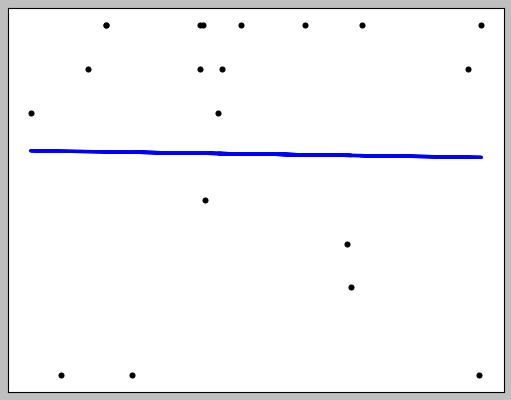

In [418]:
# Plot outputs
plt.style.use('classic')
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show();

In [419]:
#Decision tree

In [420]:
dt = pd.read_sql_query("SELECT FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,FIRE_SIZE FROM 'Fires'", conn)


In [421]:
dt['DATE'] = pd.to_datetime(df['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')

In [422]:
dt['MONTH'] = pd.DatetimeIndex(dt['DATE']).month
dt['DAY_OF_WEEK'] = dt['DATE'].dt.day_name()
dt_orig = dt.copy()
dt

,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,FIRE_SIZE,DATE,MONTH,DAY_OF_WEEK
0,2005,Miscellaneous,40.036944,-121.005833,CA,2453403.5,0.10,2005-02-02,2,Wednesday
1,2004,Lightning,38.933056,-120.404444,CA,2453137.5,0.25,2004-05-12,5,Wednesday
2,2004,Debris Burning,38.984167,-120.735556,CA,2453156.5,0.10,2004-05-31,5,Monday
3,2004,Lightning,38.559167,-119.913333,CA,2453184.5,0.10,2004-06-28,6,Monday
4,2004,Lightning,38.559167,-119.933056,CA,2453184.5,0.10,2004-06-28,6,Monday
...,...,...,...,...,...,...,...,...,...,...
1880460,2015,Missing/Undefined,40.481637,-122.389375,CA,2457291.5,0.01,2015-09-26,9,Saturday
1880461,2015,Miscellaneous,37.617619,-120.938570,CA,2457300.5,0.20,2015-10-05,10,Monday
1880462,2015,Missing/Undefined,37.617619,-120.938570,CA,2457144.5,0.10,2015-05-02,5,Saturday
1880463,2015,Missing/Undefined,37.672235,-120.898356,CA,2457309.5,2.00,2015-10-14,10,Wednesday


In [423]:
dt['STAT_CAUSE_DESCR'] = le.fit_transform(dt['STAT_CAUSE_DESCR'])
dt['STATE'] = le.fit_transform(dt['STATE'])
dt['DAY_OF_WEEK'] = le.fit_transform(dt['DAY_OF_WEEK'])
print(dt.head())

   FIRE_YEAR  STAT_CAUSE_DESCR   LATITUDE   LONGITUDE  STATE  DISCOVERY_DATE  \
0       2005                 7  40.036944 -121.005833      4       2453403.5   
1       2004                 6  38.933056 -120.404444      4       2453137.5   
2       2004                 3  38.984167 -120.735556      4       2453156.5   
3       2004                 6  38.559167 -119.913333      4       2453184.5   
4       2004                 6  38.559167 -119.933056      4       2453184.5   

   FIRE_SIZE       DATE  MONTH  DAY_OF_WEEK  
0       0.10 2005-02-02      2            6  
1       0.25 2004-05-12      5            6  
2       0.10 2004-05-31      5            1  
3       0.10 2004-06-28      6            1  
4       0.10 2004-06-28      6            1  


In [424]:
dt = dt.drop('DATE',axis=1)
dt = dt.dropna()

In [425]:
X = dt.drop(['STAT_CAUSE_DESCR'], axis=1).values
y = dt['STAT_CAUSE_DESCR'].values

In [426]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0) 

In [427]:
clf=DecisionTreeClassifier(max_depth=2,random_state=0)

In [428]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

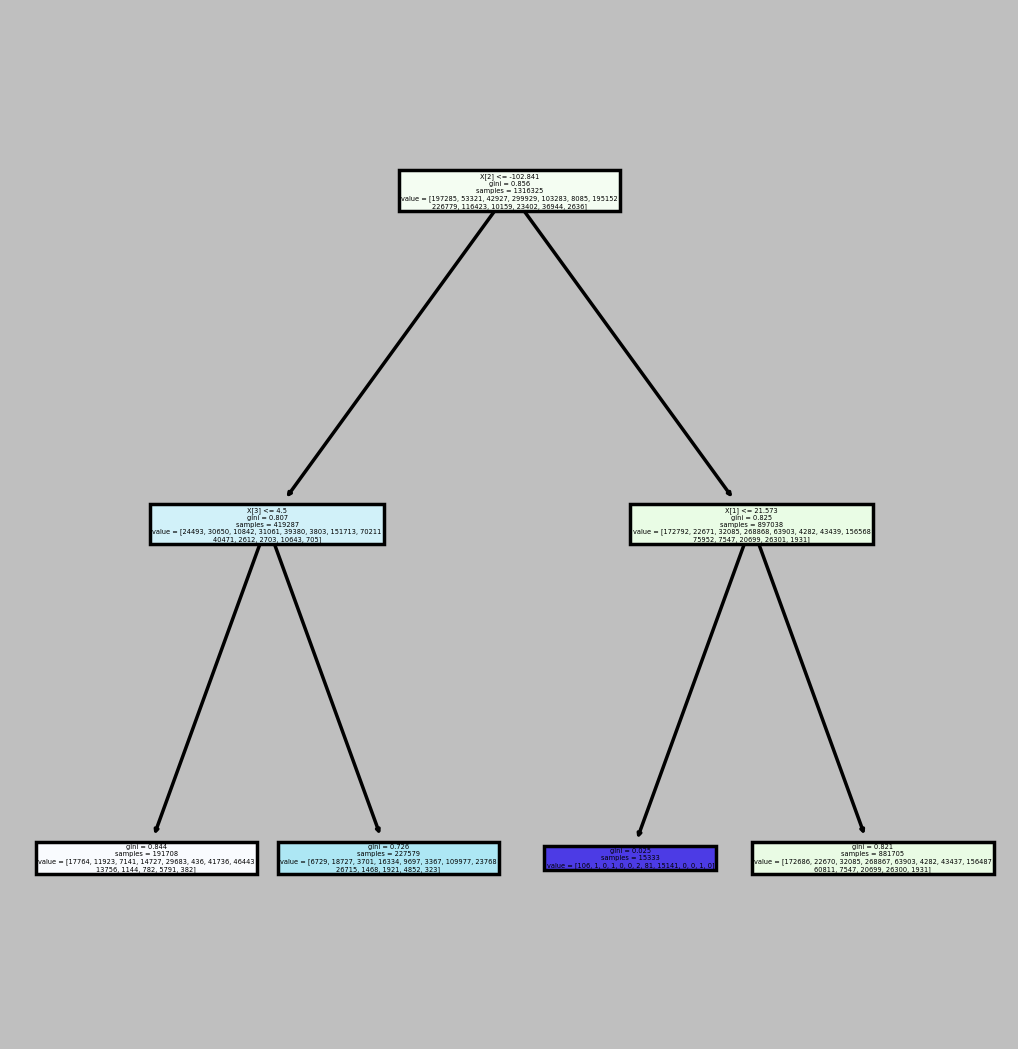

In [429]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(5,5),dpi=250)
tree.plot_tree(clf, filled=True);

In [430]:
# #predict for one observation
# clf.predict(X_test.iloc[0].values.reshape(1,-1))

In [431]:
clf.predict(X_test[0:10])

array([3, 6, 7, 6, 3, 3, 3, 3, 7, 3])

In [432]:
#decision tree socre
score=clf.score(X_test,y_test)
score

0.3342042755344418

In [433]:
#Random forest

In [434]:
clf_rf = ske.RandomForestClassifier(n_estimators=50)
clf_rf = clf_rf.fit(X_train, y_train)
print(clf_rf.score(X_test,y_test))

0.5802017229765661


In [436]:
def set_label(cat):
    cause = 0
    natural = ['Lightning']
    accidental = ['Structure','Fireworks','Powerline','Railroad','Smoking','Children','Campfire','Equipment Use','Debris Burning']
    malicious = ['Arson']
    other = ['Missing/Undefined','Miscellaneous']
    if cat in natural:
        cause = 1
    elif cat in accidental:
        cause = 2
    elif cat in malicious:
        cause = 3
    else:
        cause = 4
    return cause
     

dt['LABEL'] = dt_orig['STAT_CAUSE_DESCR'].apply(lambda x: set_label(x)) # I created a copy of the original df earlier in the kernel
dt = dt.drop('STAT_CAUSE_DESCR',axis=1)
print(dt.head())

   FIRE_YEAR   LATITUDE   LONGITUDE  STATE  DISCOVERY_DATE  FIRE_SIZE  MONTH  \
0       2005  40.036944 -121.005833      4       2453403.5       0.10      2   
1       2004  38.933056 -120.404444      4       2453137.5       0.25      5   
2       2004  38.984167 -120.735556      4       2453156.5       0.10      5   
3       2004  38.559167 -119.913333      4       2453184.5       0.10      6   
4       2004  38.559167 -119.933056      4       2453184.5       0.10      6   

   DAY_OF_WEEK  LABEL  
0            6      4  
1            6      1  
2            1      2  
3            1      1  
4            1      1  


In [437]:
X = dt.drop(['LABEL'], axis=1).values
y = dt['LABEL'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)
clf_rf = ske.RandomForestClassifier(n_estimators=50)
clf_rf = clf_rf.fit(X_train, y_train)
print(clf_rf.score(X_test,y_test))

0.7010759740489949


In [438]:
from sklearn.metrics import confusion_matrix
y_pred = clf_rf.fit(X_train, y_train).predict(X_test)
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
print(cm)

[[ 67918  10306    880   4212]
 [ 10228 200414  16786  21900]
 [  1494  36446  38590   7640]
 [  6618  46488   5260  88960]]


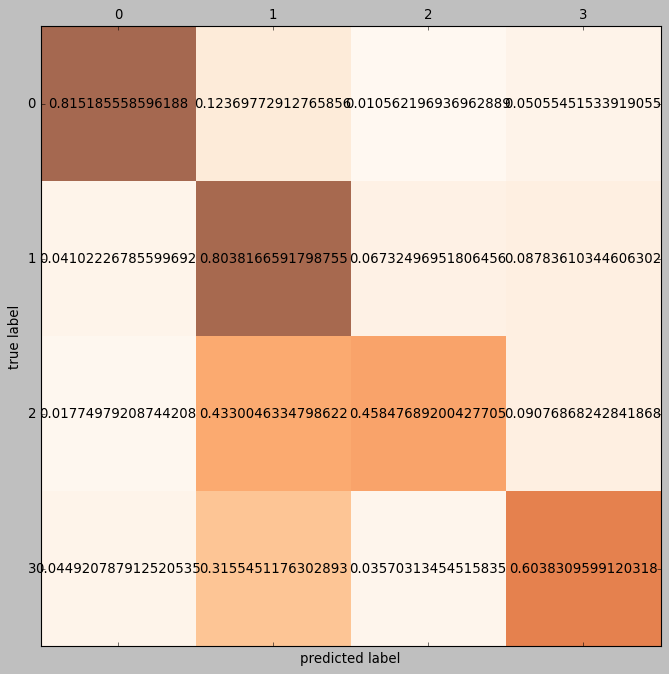

In [439]:
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig,ax = plt.subplots(figsize=(10,10))
ax.matshow(cmn,cmap=plt.cm.Oranges,alpha=0.7)
for i in range(cmn.shape[0]):
    for j in range(cmn.shape[1]):
        ax.text(x=j,y=i,s=cmn[i,j],va='center',ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

In [ ]:
# reg.fit(X_train,y_train)

In [ ]:
# reg.predict(X_test.iloc[0].values.reshape(1,-1))

In [ ]:
# reg.predict(X_test[0:10])

In [341]:
# data_CA = pd.read_sql_query("SELECT FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,DISCOVERY_DATE FROM 'Fires' where STATE='CA'", conn)
# data_CA

,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,DISCOVERY_DATE
0,2005,Miscellaneous,40.036944,-121.005833,2453403.5
1,2004,Lightning,38.933056,-120.404444,2453137.5
2,2004,Debris Burning,38.984167,-120.735556,2453156.5
3,2004,Lightning,38.559167,-119.913333,2453184.5
4,2004,Lightning,38.559167,-119.933056,2453184.5
...,...,...,...,...,...
189545,2015,Missing/Undefined,40.481637,-122.389375,2457291.5
189546,2015,Miscellaneous,37.617619,-120.938570,2457300.5
189547,2015,Missing/Undefined,37.617619,-120.938570,2457144.5
189548,2015,Missing/Undefined,37.672235,-120.898356,2457309.5


In [342]:
# le = preprocessing.LabelEncoder()
# data_CA['STAT_CAUSE_DESCR'] = le.fit_transform(data_CA['STAT_CAUSE_DESCR'])
# data_CA['DATE'] = pd.to_datetime(data_CA['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
# data_CA['MONTH'] = pd.DatetimeIndex(data_CA['DISCOVERY_DATE']).month
# data_CA['DAY_OF_WEEK'] = data_CA['DATE'].dt.day_name()
# data_CA

,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,DISCOVERY_DATE,DATE,MONTH,DAY_OF_WEEK
0,2005,7,40.036944,-121.005833,2453403.5,2005-02-02,1,Wednesday
1,2004,6,38.933056,-120.404444,2453137.5,2004-05-12,1,Wednesday
2,2004,3,38.984167,-120.735556,2453156.5,2004-05-31,1,Monday
3,2004,6,38.559167,-119.913333,2453184.5,2004-06-28,1,Monday
4,2004,6,38.559167,-119.933056,2453184.5,2004-06-28,1,Monday
...,...,...,...,...,...,...,...,...
189545,2015,8,40.481637,-122.389375,2457291.5,2015-09-26,1,Saturday
189546,2015,7,37.617619,-120.938570,2457300.5,2015-10-05,1,Monday
189547,2015,8,37.617619,-120.938570,2457144.5,2015-05-02,1,Saturday
189548,2015,8,37.672235,-120.898356,2457309.5,2015-10-14,1,Wednesday


In [343]:
# data_CA['DAY_OF_WEEK'] = le.fit_transform(data_CA['DAY_OF_WEEK'])
# data_CA = data_CA.drop('DATE',axis=1)
# # data_CA = data_CA.drop('STAT_CAUSE_DESCR',axis=1)
# data_CA = data_CA.dropna()

In [331]:
# def set_arson_label(cause):
#     arson = 0
#     if cause == 'Arson':
#         arson = 1
#     return arson
     

# data_CA['ARSON'] = data_CA['STAT_CAUSE_DESCR'].apply(lambda x: set_arson_label(x)) 
# data_CA = data_CA.drop('STAT_CAUSE_DESCR',axis=1)
# data_CA

,FIRE_YEAR,LATITUDE,LONGITUDE,DISCOVERY_DATE,MONTH,DAY_OF_WEEK,ARSON
0,2005,40.036944,-121.005833,2453403.5,1,6,0
1,2004,38.933056,-120.404444,2453137.5,1,6,0
2,2004,38.984167,-120.735556,2453156.5,1,1,0
3,2004,38.559167,-119.913333,2453184.5,1,1,0
4,2004,38.559167,-119.933056,2453184.5,1,1,0
...,...,...,...,...,...,...,...
1880460,2015,40.481637,-122.389375,2457291.5,1,2,0
1880461,2015,37.617619,-120.938570,2457300.5,1,1,0
1880462,2015,37.617619,-120.938570,2457144.5,1,2,0
1880463,2015,37.672235,-120.898356,2457309.5,1,6,0


In [332]:
# data_CA = data_CA.dropna()


In [344]:
# X_CA = data_CA.drop(['STAT_CAUSE_DESCR'], axis=1).values
# y_CA = data_CA['STAT_CAUSE_DESCR'].values
# X_train_CA, X_test_CA, y_train_CA, y_test_CA = train_test_split(X_CA,y_CA,test_size=0.3, random_state=0) #30% for testing, 70% for training
# clf_rf = ske.RandomForestClassifier(n_estimators=200)
# clf_rf = clf_rf.fit(X_train_CA, y_train_CA)
# print(clf_rf.score(X_test_CA,y_test_CA))

0.48043612063659547
